In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy

from datetime import datetime
from matplotlib.ticker import MaxNLocator, MultipleLocator
from numpy import array
from pandas import DataFrame
from pandas.plotting import register_matplotlib_converters
from tkinter import filedialog
from tkinter import *

register_matplotlib_converters()

%matplotlib inline

In [2]:
def get_file():

# Select input file
    root = Tk()
    root.filename =  filedialog.askopenfilename(initialdir = "C:\QGHL\Wave_data\Master_files", title = "Select SECO master file",\
                        filetypes = (("Seco files","*.Seco"),("Seco files","*.seco"),("all files","*.*")))
    root.destroy()

    return(root.filename)

In [3]:
def close():
    global lb, master, item1
    try:
        item1 = lb.get(lb.curselection())
    except:
        item1 = 'Nothing selected'
    master.destroy()
    return(item1)

Data available between  1995-01-13 14:00:00  and  2019-05-31 23:30:00
Enter a date to view Spectra (i.e. YYYY MM DD) 2010 1 1
2010-01-01T05:30:00.000000000


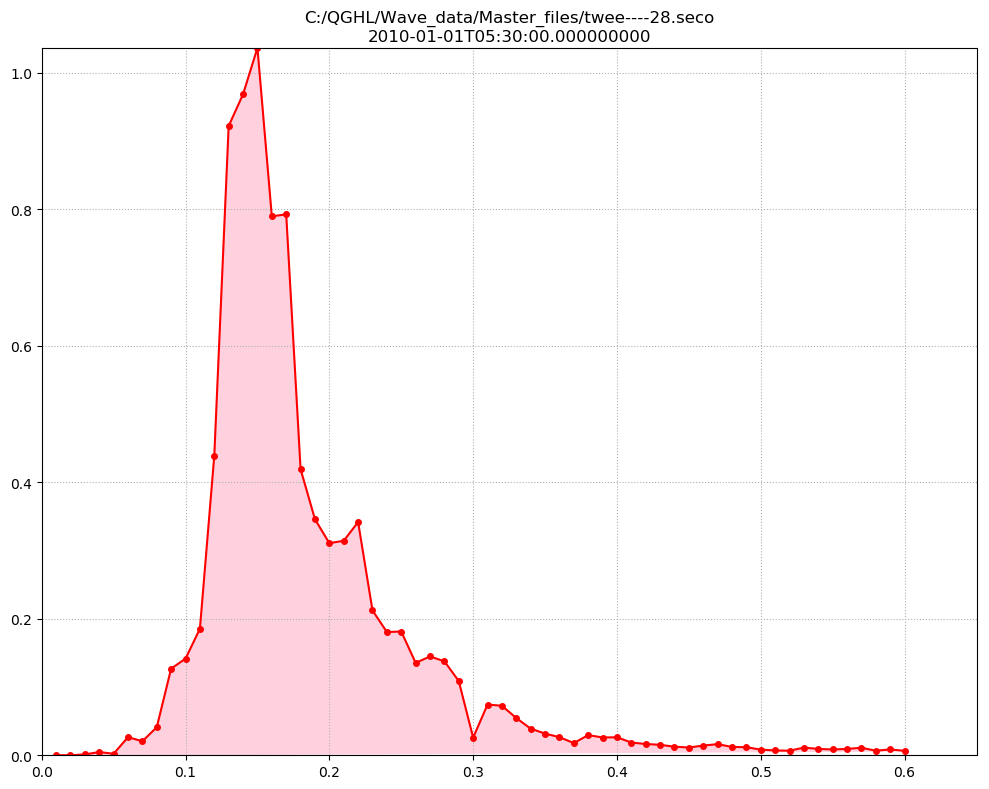

2010-01-01T02:30:00.000000000


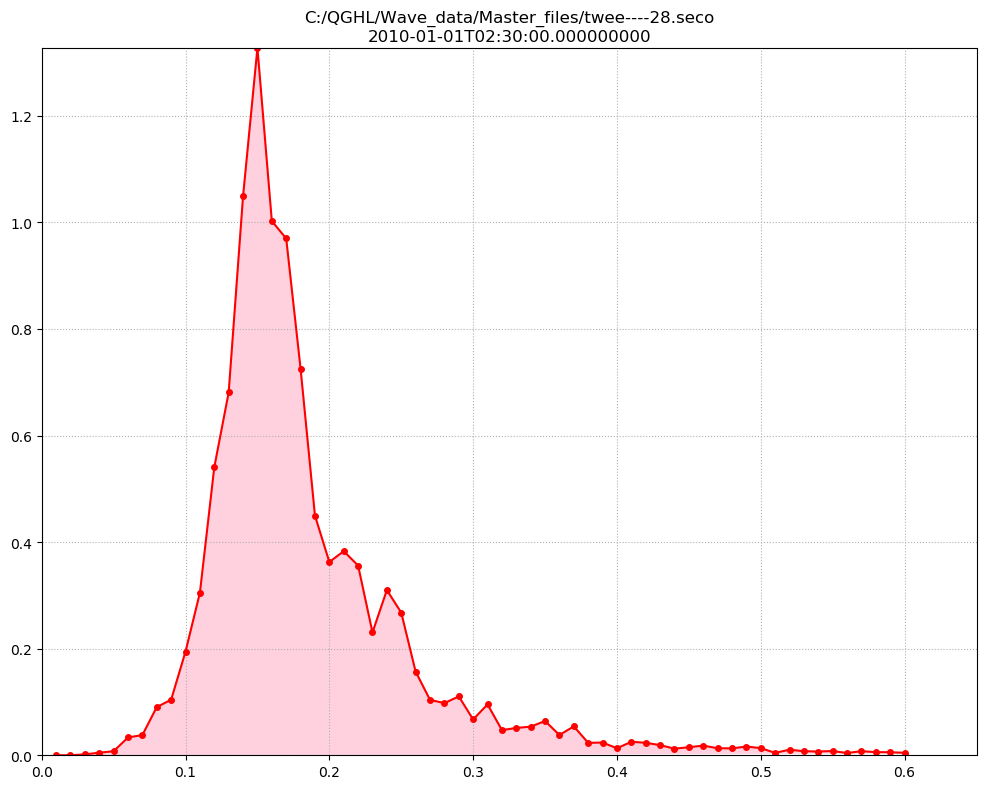

2010-01-01T10:30:00.000000000


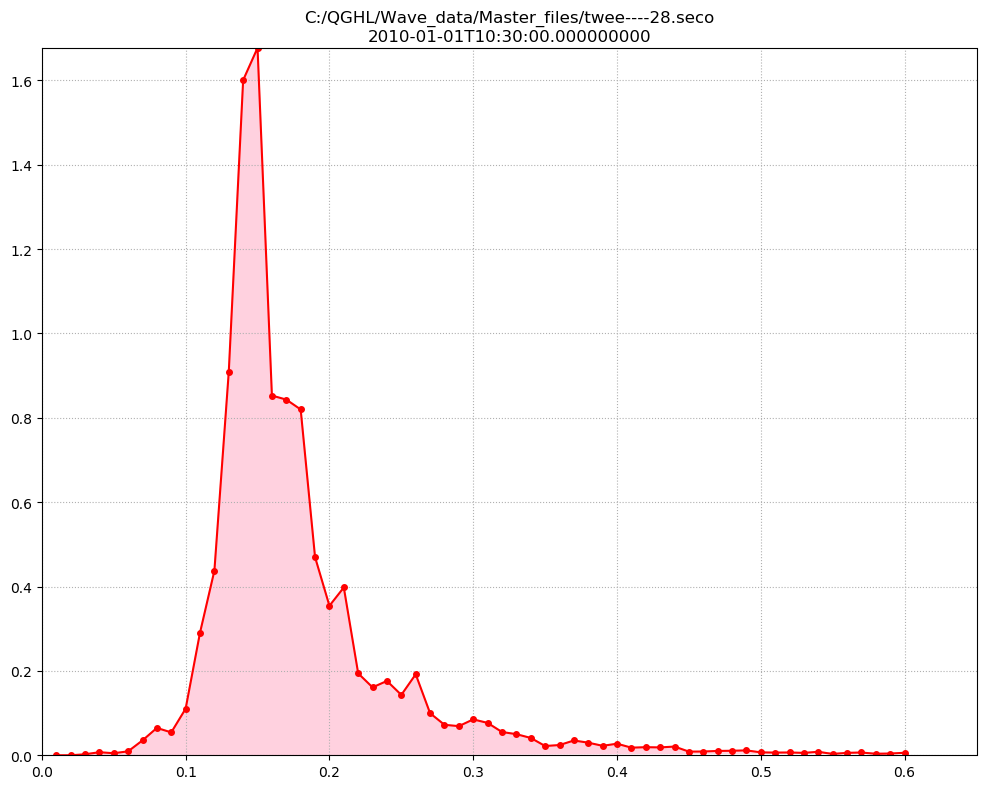

2010-01-01T10:30:00.000000000


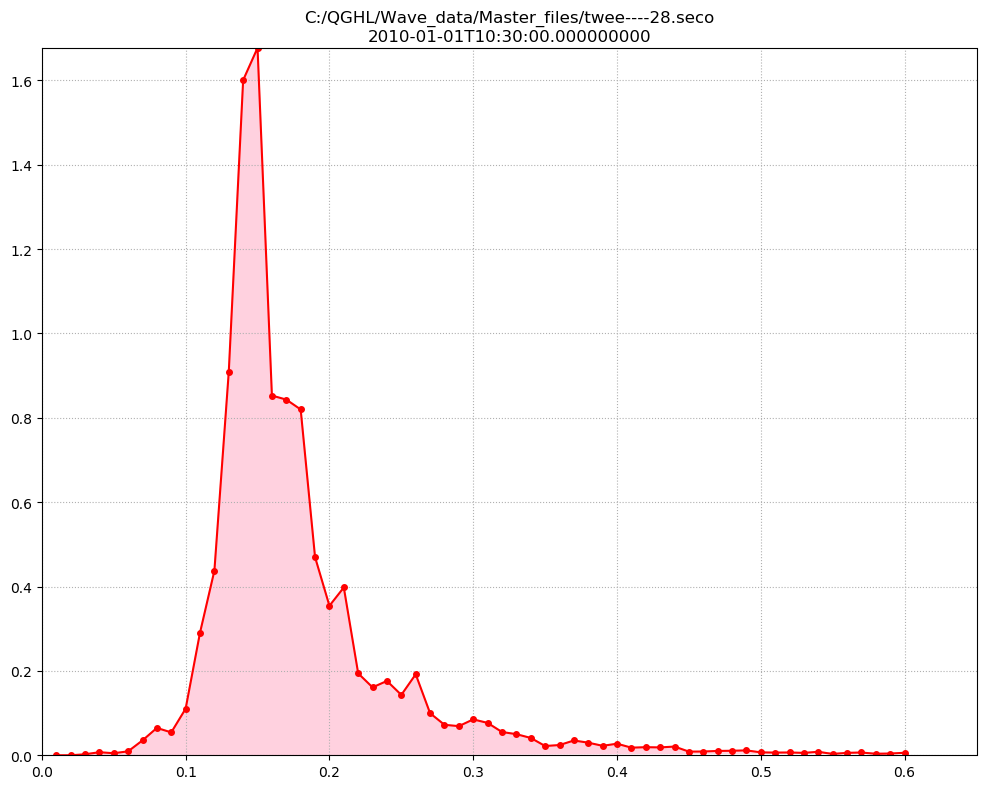

Program terminated by user


In [4]:
# Create a DT based on the structure type of the SECO Master File
# Details copied from PV~Wave file Master_structure_types_corrected.pro

rectype = np.dtype([('Loc','i'),
#                    ('Year','i'),('Month','i'),('Day', 'i'),('Hour', 'i'),('Min', 'i'), ('Sec','i'),
                    ('date_val','i2',(12)),
                    ('Spc', 'f', (60,))
                   ])

# Get name of input SECO file
Input_Seco_File = get_file()

# Open file
f = open(Input_Seco_File)

# Read data from the Binary file into a DF based on the structure in the DT
data = np.fromfile(f, rectype)
recs = DataFrame.from_records(np.array(data).tolist())

recs.columns = ['Loc','date_val','Spc']

# Remove errant zero's from data
recs = recs.loc[recs.date_val.apply(lambda x: x[0])!=0]


# Convert date/time column data into Dates and times
Record_time = pd.DataFrame(recs.date_val.values.tolist(), \
        columns=['year','j1','month','j2','day','j3','hour','j4','minute','j5','second','j6'])

Record_time['year'] = Record_time['year'].mask(Record_time['year'] < 1900, Record_time['year'] + 1900)

# Insert Date column at start of DF
recs.index = pd.to_datetime(Record_time[['year','month','day','hour','minute','second']],format='%Y:%m:%d:%H:%M:%S')

recs = recs.drop(['Loc', 'date_val'], axis=1)

print('Data available between ',recs.index[0],' and ',recs.index[-1])
date_entry = input('Enter a date to view Spectra (i.e. YYYY MM DD) ')
year, month, day = map(int, date_entry.split(' '))
date = datetime(year, month, day)

try:
    start_date = recs.loc[recs.index.values==np.datetime64(date)]
    end_date = recs.loc[recs.index.values==np.datetime64(date) + np.timedelta64(1,'D')]
    records = recs.loc[start_date.index.values[0]:end_date.index.values[0]]
except:
    print("Can't find ", date)
    
records = recs.loc[start_date.index.values[0]:end_date.index.values[0]]
    
freq = []

for i in range(60):
    freq.append(0.01 + i*0.01) 
                
item1 = ''                
                
while item1 != 'EXIT':
    master = Tk()   
    master.title("SELECT DATE/TIME")

    scrollbar = Scrollbar(master, orient="vertical")
    lb = Listbox(master, width=30, height=50, font=('Aerial',10),justify='center',yscrollcommand=scrollbar.set)
    scrollbar.config(command=lb.yview)

    scrollbar.pack(side="right", fill="y")
    lb.pack(side="left",fill="both", expand=True)

    lb.insert('end', 'EXIT')
    for item in records.index.values:
        lb.insert('end', item)
    lb.insert('end', 'EXIT')
    lb.focus()

    b = Button(master, text = "OK", command = close).pack()

    try:
        master.mainloop()

    except:
        pass

    if (item1 != 'EXIT'):
        print(item1)
        
        npower = recs.loc[item1].Spc.values[0]
        
        try:
            fig, ax1 = plt.subplots(figsize=(10,8),dpi=100)

            ax1.set_title(Input_Seco_File+'\n'+item1,fontsize=12)

            ax1.set_xlim(left=0,right=0.65)
            ax1.set_ylim(bottom=0,top=max(npower))
            ax1.plot(freq,npower,color='r',marker='o',markersize=4)
            ax1.fill(freq,npower,c='xkcd:light pink')
            ax1.grid(True,axis='both',linestyle=':')

            fig.tight_layout() 
            plt.show()
            
        except:
            print('ALERT: Can not display record!')
        
    else:
        print('Program terminated by user')


In [5]:
len(freq)

60

In [6]:
item1

'EXIT'

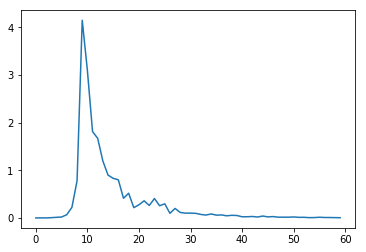

In [7]:
plt.plot(records.Spc.values[0])